In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import os
from os import path, getcwd, listdir, mkdir
import torch as t

import sys
sys.path.insert(0, '../../fhn_model')
from diffusion_gumbel import diffuse_STE
from reaction_diff import  rho_STE
from tqdm import tqdm

In [2]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb} \n \\usepackage{color}"

In [3]:
param_trace = np.load("./data/param_trace.npy")
print(param_trace.shape)

(3, 5601)


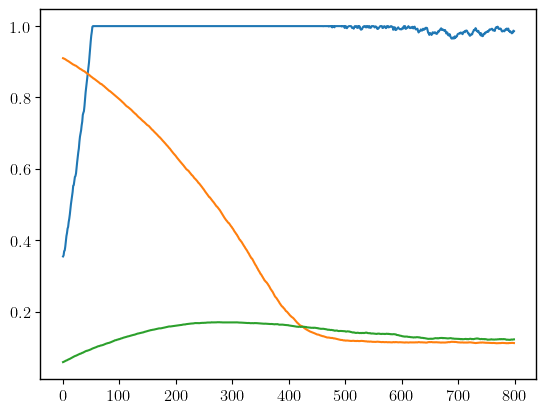

In [76]:
num_steps = 800
stepcounter = np.arange(num_steps)
plt.plot(stepcounter, param_trace[0, :num_steps])
plt.plot(stepcounter, param_trace[1, :num_steps])
plt.plot(stepcounter, param_trace[2, :num_steps])

In [5]:
results = np.load("./data/results.npy")
results.shape
df = pd.DataFrame(results)

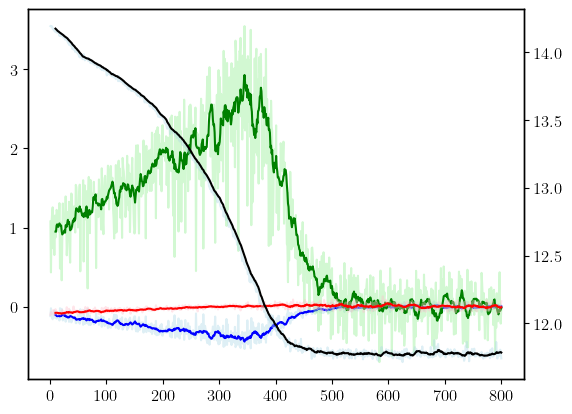

In [6]:
plt.plot(df.iloc[1, 1:num_steps+1], 'lightblue', alpha=0.4)
plt.plot(df.iloc[1, 1:num_steps+1].rolling(10).mean(), 'b')
plt.plot(df.iloc[2, 1:num_steps+1], 'lightgreen', alpha=0.4)
plt.plot(df.iloc[2, 1:num_steps+1].rolling(10).mean(), 'g')
plt.plot(df.iloc[3, 1:num_steps+1], 'pink', alpha=0.4)
plt.plot(df.iloc[3, 1:num_steps+1].rolling(10).mean(), 'r')

axs2 = plt.twinx()

axs2.plot(df.iloc[0, 1:num_steps+1], 'lightblue', alpha=0.4)
axs2.plot(df.iloc[0, 1:num_steps+1].rolling(10).mean(), "black")

In [84]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

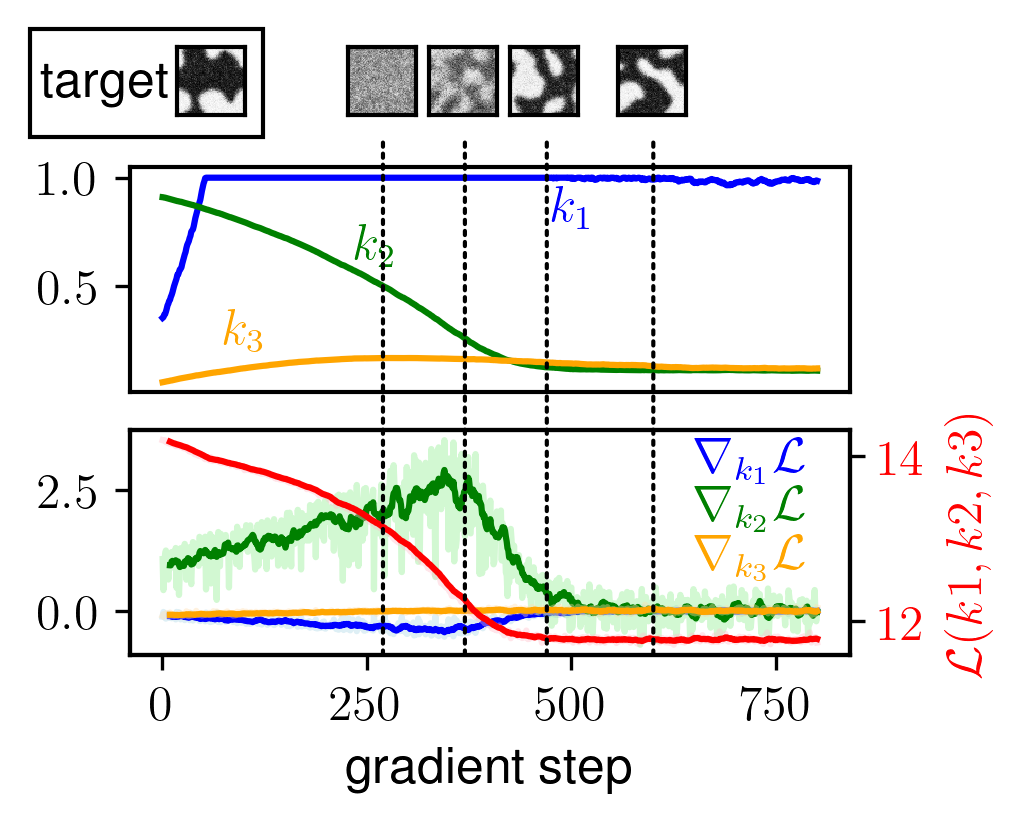

In [220]:
num_steps = 800
fig = plt.figure(layout='constrained', figsize=(6,2.5), dpi=300)

axs_top_left = fig.add_axes([0,0.35,0.4,0.3])
axs_top_left.plot(stepcounter, param_trace[0, :num_steps], "b")
axs_top_left.annotate(
    "$k_1$",
    (500, param_trace[0,499]),
    textcoords="offset points", # how to position the text
    xytext=(0,-10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="b"
)
axs_top_left.plot(stepcounter, param_trace[1, :num_steps], "g")
axs_top_left.annotate(
    "$k_2$",
    (300, param_trace[1,299]),
    textcoords="offset points", # how to position the text
    xytext=(-8.0,10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="g"
)
axs_top_left.plot(stepcounter, param_trace[2, :num_steps], "orange")
axs_top_left.annotate(
    "$k_3$",
    (100, param_trace[2,99]),
    textcoords="offset points", # how to position the text
    xytext=(0,6), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="orange"
)
for tic in axs_top_left.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)


axs_bot_left = fig.add_axes([0,0,0.4,0.3])
axs_bot_left.plot(df.iloc[1, 1:num_steps+1], 'lightblue', alpha=0.4)
axs_bot_left.plot(df.iloc[1, 1:num_steps+1].rolling(10).mean(), 'b', label=r"$\nabla_{k_1}\mathcal{L}$")
axs_bot_left.plot(df.iloc[2, 1:num_steps+1], 'lightgreen', alpha=0.4)
axs_bot_left.plot(df.iloc[2, 1:num_steps+1].rolling(10).mean(), 'g', label=r"$\nabla_{k_2}\mathcal{L}$")
axs_bot_left.plot(df.iloc[3, 1:num_steps+1], 'navajowhite', alpha=0.4)
axs_bot_left.plot(df.iloc[3, 1:num_steps+1].rolling(10).mean(), 'orange', label=r"$\nabla_{k_3}\mathcal{L}$")

#axs_bot_left.legend(handlelength=0.5, )
axs2 = plt.twinx()

axs2.plot(df.iloc[0, 1:num_steps+1], 'pink', alpha=0.4)
axs2.plot(df.iloc[0, 1:num_steps+1].rolling(10).mean(), "red")
#axs2.annotate(
#    r"",
#    (175, results[0,175]),
#    textcoords="offset points", # how to position the text
#    xytext=(-7,8), # distance from text to points (x,y)
#    ha='center', # horizontal alignment can be left, right or center
#)
axs_bot_left.text(650,2.9, r"$\nabla_{k_1}\mathcal{L}$", color="blue")
axs_bot_left.text(650,1.9, r"$\nabla_{k_2}\mathcal{L}$", color="green")
axs_bot_left.text(650,0.9, r"$\nabla_{k_3}\mathcal{L}$", color="orange")
axs2.set_ylabel(r"$\mathcal{L}(k1,k2,k3)$", color="red")
axs2.tick_params(axis='y', labelcolor="red")
axs_bot_left.set_xlabel("gradient step")


grid_reference = t.load("./data/0.pt", map_location=t.device('cpu'))
pattern_ref = fig.add_axes([-0.0,0.72,0.09,0.09])
pattern_ref.imshow(grid_reference[0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_ref)
pattern_ref.add_patch(
    mpl.patches.Rectangle((-140,-18), 220.5, 102, fill=False, clip_on=False)
)

grid_start = np.load("./data/inference/270.npy")
pattern_start = fig.add_axes([0.095,0.72,0.09,0.09])
pattern_start.imshow(grid_start[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_start)

grid_2 = np.load("./data/inference/370.npy")
pattern_2= fig.add_axes([0.14,0.72,0.09,0.09])
pattern_2.imshow(grid_2[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_2)

grid_3 = np.load("./data/inference/450.npy")
pattern_3= fig.add_axes([0.185,0.72,0.09,0.09])
pattern_3.imshow(grid_3[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_3)

grid_4 = np.load("./data/inference/600.npy")
pattern_4= fig.add_axes([0.245,0.72,0.09,0.09])
pattern_4.imshow(grid_4[0,0],cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(pattern_4)

axs2.annotate('',
    (270,11.5),
    (270,17.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs2.annotate('',
    (370,11.5),
    (370,17.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs2.annotate('',
    (470,11.5),
    (470,17.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

axs2.annotate('',
    (600,11.5),
    (600,17.9),
    arrowprops=dict({
        'arrowstyle': "-",
        'linestyle': "dotted"
    }),
    annotation_clip=False,
)

fig.text(-0.05,0.745,"target")
plt.show()

In [158]:
N = 50
num_steps = 50_000
DA = t.tensor(0.1)
DB = t.tensor(0.4)
gamma = 0.005

steps = [260, 270, 280, 290]

for step in steps:
    k1 = k1_bar = t.tensor(param_trace[0, step])
    k2 = k2_bar = t.tensor(param_trace[1, step])
    k3 = k3_bar = t.tensor(param_trace[2, step])
    
    X = t.zeros((1, 2, 64, 64))
    X[:] = 25
    X[0, 29:35] = 40
    
    for sim_step in tqdm(range(num_steps)):
        # run the diffusion step
        X = diffuse_STE(X, N, DA, DB)
        # run the reaction step
        X = rho_STE(X, N, gamma, k1, k1, k2, k2, k3, k3)
    
    np.save(f"./data/inference/{step}.npy", X.numpy())
    

100%|██████████| 50000/50000 [04:59<00:00, 166.73it/s]
